**WEEK 14:**
i. Write a program to implement the Perceptron Learning algorithm for binary
classification on the iris dataset.


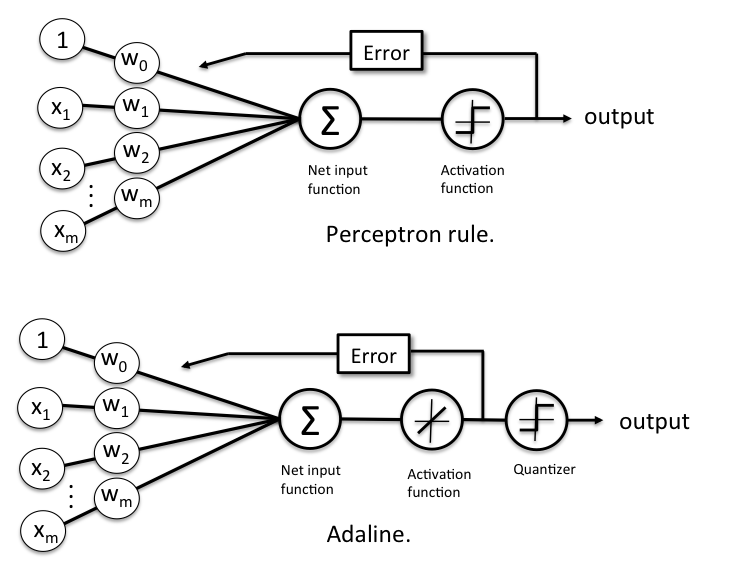

In [ ]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Weights: [-0.4  -0.68  1.82]


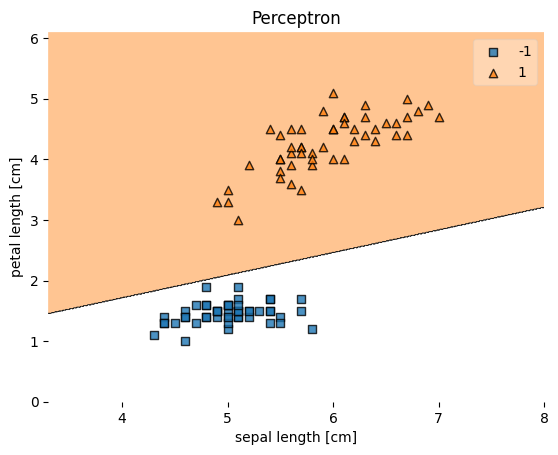

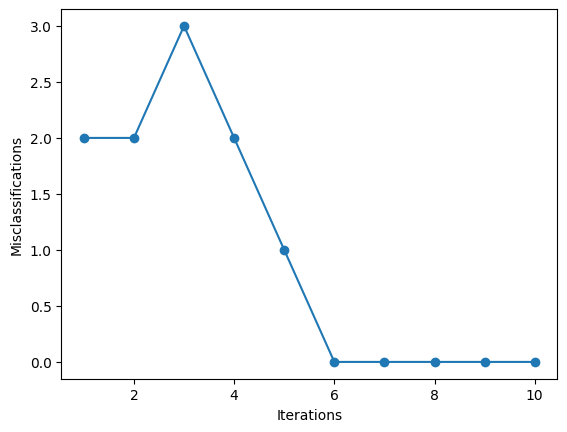

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

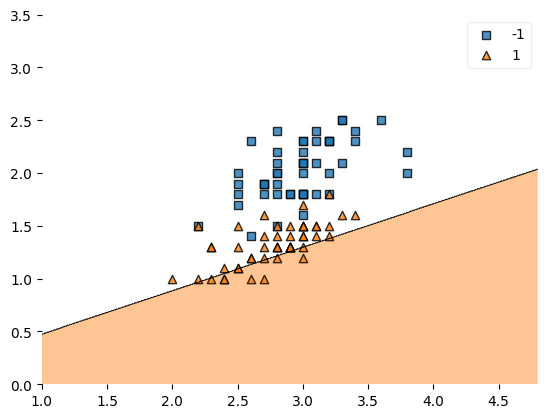

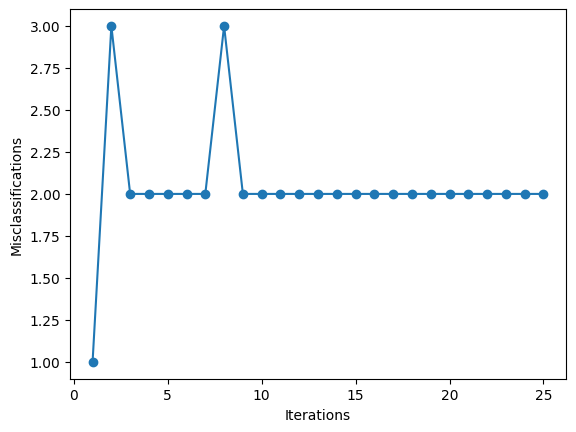

In [ ]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, eta=0.01)
ppn.train(X2, y2)

plot_decision_regions(X2, y2, clf=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


In [ ]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn.predict(X2)).sum())

Total number of misclassifications: 43 of 100


**WEEK 14:**
ii. Write a program to demonstrate a simple neural network that has one input layer,
one hidden layer, and one output layer, which includes the forward and backward
propagation algorithms for training the neural network.

In [ ]:
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation


In [ ]:
# Transfer neuron activation
import numpy as np
def transfer(activation):
	return 1.0 / (1.0 + np.exp(-activation))


In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)


In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']


In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))


In [ ]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [np.float64(-1.4688375095432327), np.float64(1.850887325439514), np.float64(1.0858178629550297)], 'output': np.float64(0.029980305604426185), 'delta': np.float64(0.0059546604162323625)}, {'weights': [np.float64(0.37711098142462157), np.float64(-0.0625909894552989), np.float64(

In [ ]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [ ]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
	[{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
	prediction = predict(network, row)
	print('Expected=%d, Predicted=%d' % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
